### Data Cleaning

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
import re
from numpy.random import normal
from scipy.stats import kurtosis, skew
import math
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from six import StringIO 
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from IPython.display import Image
import pydotplus
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('UCI_Credit_Card.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df = df.rename(columns={'default.payment.next.month': 'default_payment_next_month'})
df = df.drop(['ID'], axis=1)

### 1. Linear Model

#### Statsmodels

In [5]:
#Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
#Build regression model 

outcome='default_payment_next_month'
cols=[col for col in df.columns]
cols.remove('default_payment_next_month')
predictors='+'.join(cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     default_payment_next_month   R-squared:                       0.124
Model:                                    OLS   Adj. R-squared:                  0.123
Method:                         Least Squares   F-statistic:                     184.5
Date:                        Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                                17:13:24   Log-Likelihood:                -14202.
No. Observations:                       30000   AIC:                         2.845e+04
Df Residuals:                           29976   BIC:                         2.865e+04
Df Model:                                  23                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3142      0.018     17.541      0.000       0.279       0.349
LIMIT_BAL  -9.053e-08   2.16e-08     -4.193      0.000   -1.33e-07   -4.82e-08
SEX           -0.0145      0.005     -3.130      0.002      -0.024      -0.005
EDUCATION     -0.0151      0.003     -5.022      0.000      -0.021      -0.009
MARRIAGE      -0.0238      0.005     -4.996      0.000      -0.033      -0.014
AGE            0.0014      0.000      5.128      0.000       0.001       0.002
PAY_0          0.0957      0.003     34.596      0.000       0.090       0.101
PAY_2          0.0195      0.003      5.828      0.000       0.013       0.026
PAY_3          0.0117      0.004      3.256      0.001       0.005       0.019
PAY_4          0.0034      0.004      0.846      0.398      -0.004       0.011
PAY_5          0.0057      0.004      1.324      0.185      -0.003       0.014
PAY_6          0.0008      0.004      0.225      0.822      -0.006       0.008
BILL_AMT1  -6.225e-07   1.14e-07     -5.453      0.000   -8.46e-07   -3.99e-07
BILL_AMT2   1.587e-07    1.6e-07      0.990      0.322   -1.56e-07    4.73e-07
BILL_AMT3   3.005e-08   1.51e-07      0.199      0.842   -2.66e-07    3.26e-07
BILL_AMT4  -6.793e-08   1.57e-07     -0.432      0.666   -3.76e-07     2.4e-07
BILL_AMT5  -2.049e-08   1.85e-07     -0.111      0.912   -3.82e-07    3.41e-07
BILL_AMT6   1.153e-07   1.46e-07      0.789      0.430   -1.71e-07    4.02e-07
PAY_AMT1   -7.437e-07   1.77e-07     -4.201      0.000   -1.09e-06   -3.97e-07
PAY_AMT2   -2.092e-07   1.46e-07     -1.436      0.151   -4.95e-07    7.63e-08
PAY_AMT3   -2.874e-08   1.69e-07     -0.170      0.865    -3.6e-07    3.02e-07
PAY_AMT4   -2.521e-07   1.84e-07     -1.371      0.170   -6.13e-07    1.08e-07
PAY_AMT5    -3.41e-07   1.91e-07     -1.787      0.074   -7.15e-07     3.3e-08
PAY_AMT6    -9.77e-08   1.37e-07     -0.716      0.474   -3.65e-07     1.7e-07
==============================================================================
Omnibus:                     4682.286   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7285.821
Skew:                           1.204   Prob(JB):                         0.00
Kurtosis:                       3.178   Cond. No.                     2.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
#Train-Test-Split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
#Fit the model on the train data
formula=outcome+'~'+predictors
model=ols(formula=formula,data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     default_payment_next_month   R-squared:                       0.125
Model:                                    OLS   Adj. R-squared:                  0.124
Method:                         Least Squares   F-statistic:                     149.1
Date:                        Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                                17:13:25   Log-Likelihood:                -11369.
No. Observations:                       24000   AIC:                         2.279e+04
Df Residuals:                           23976   BIC:                         2.298e+04
Df Model:                                  23                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3098      0.020     15.446      0.000       0.270       0.349
LIMIT_BAL  -9.692e-08   2.42e-08     -4.009      0.000   -1.44e-07   -4.95e-08
SEX           -0.0158      0.005     -3.043      0.002      -0.026      -0.006
EDUCATION     -0.0146      0.003     -4.352      0.000      -0.021      -0.008
MARRIAGE      -0.0229      0.005     -4.298      0.000      -0.033      -0.012
AGE            0.0016      0.000      5.084      0.000       0.001       0.002
PAY_0          0.0952      0.003     30.735      0.000       0.089       0.101
PAY_2          0.0206      0.004      5.489      0.000       0.013       0.028
PAY_3          0.0110      0.004      2.715      0.007       0.003       0.019
PAY_4          0.0067      0.004      1.505      0.132      -0.002       0.015
PAY_5          0.0029      0.005      0.595      0.552      -0.007       0.012
PAY_6          0.0019      0.004      0.483      0.629      -0.006       0.010
BILL_AMT1  -6.045e-07   1.28e-07     -4.722      0.000   -8.55e-07   -3.54e-07
BILL_AMT2    1.63e-07   1.81e-07      0.902      0.367   -1.91e-07    5.17e-07
BILL_AMT3    4.47e-08   1.69e-07      0.265      0.791   -2.86e-07    3.75e-07
BILL_AMT4  -1.577e-07   1.73e-07     -0.909      0.363   -4.98e-07    1.82e-07
BILL_AMT5   -9.44e-09   2.07e-07     -0.046      0.964   -4.15e-07    3.97e-07
BILL_AMT6   1.179e-07   1.66e-07      0.712      0.477   -2.07e-07    4.43e-07
PAY_AMT1   -5.985e-07   1.94e-07     -3.083      0.002   -9.79e-07   -2.18e-07
PAY_AMT2   -2.075e-07    1.6e-07     -1.299      0.194   -5.21e-07    1.06e-07
PAY_AMT3    7.262e-08   1.86e-07      0.390      0.697   -2.92e-07    4.38e-07
PAY_AMT4   -2.295e-07   1.99e-07     -1.152      0.250    -6.2e-07    1.61e-07
PAY_AMT5   -1.895e-07    2.1e-07     -0.902      0.367   -6.01e-07    2.22e-07
PAY_AMT6   -1.375e-07   1.55e-07     -0.886      0.375   -4.42e-07    1.67e-07
==============================================================================
Omnibus:                     3750.617   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5836.711
Skew:                           1.205   Prob(JB):                         0.00
Kurtosis:                       3.182   Cond. No.                     2.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#Predict the model using the test data 
y_hat_test = model.predict(test)
y_test = test['default_payment_next_month']

#Do the same for the train data
y_hat_train = model.predict(train)
y_train = train['default_payment_next_month']

In [10]:
#Evaluate the model using MSE and RMSE
mse_test = mean_squared_error(y_hat_test, y_test)
mse_train = mean_squared_error(y_hat_train, y_train)

print('Train Mean squared error: ', mse_train)
print('Test Mean squared error: ', mse_test)
print('Train RMSE: ', np.sqrt(mse_train))
print('Test RMSE: ', np.sqrt(mse_test))

Train Mean squared error:  0.1509996248474726
Test Mean squared error:  0.15066548456702586
Train RMSE:  0.38858670184075084
Test RMSE:  0.3881565207065648


### 2. Logistic Model

In [11]:
#Look at our data again 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000 non-null float64
PAY_AMT1  

In [12]:
#Create dummy variables
relevant_columns = ['default_payment_next_month', 'LIMIT_BAL', 'SEX', 'EDUCATION', 
                    'MARRIAGE', 'AGE', 'PAY_0','BILL_AMT1', 'PAY_AMT1']
dummy_dataframe = pd.get_dummies(df[relevant_columns], drop_first=True, dtype=float)

In [13]:
#split X and Y
y = dummy_dataframe['default_payment_next_month']
X = dummy_dataframe.drop(columns=['default_payment_next_month'], axis=1)

In [14]:
#Fill NA values
X = X.fillna(value=0)

In [15]:
#Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
#Scale the data
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test) 

In [17]:
#Instantiate the classifier 
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

In [18]:
#Fit the model
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [19]:
#Make predictions 

y_hat_train = logreg.predict(X_train_scaled)
y_hat_test = logreg.predict(X_test_scaled)

In [20]:
#Check when model is correct on training set 

residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))


0    13828
1     8672
Name: default_payment_next_month, dtype: int64
0    0.614578
1    0.385422
Name: default_payment_next_month, dtype: float64


Result for train set shows that 18,002 values are correct with approximately 80% accuracy.

In [21]:
#Check when model is correct on test set

residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    4641
1    2859
Name: default_payment_next_month, dtype: int64
0    0.6188
1    0.3812
Name: default_payment_next_month, dtype: float64


Result for test set shows that 6071 values are correct with approximately 81% accuracy.

#### Evaluation Metrics

In [22]:
#write function to print score results 

def performance_results(trainx, trainy, train_prediction, testx, testy, test_prediction, model):  
    
    print("\n")
    
    print("Train Score Results")
    print(classification_report(trainy, train_prediction))       
    print(f'Train Set Accuracy: {accuracy_score(trainy, train_prediction):.4f}')
    print(f'Train Set Precision: {precision_score(trainy, train_prediction):.4f}')
    print(f'Train Set Recall: {recall_score(trainy, train_prediction):.4f}')
    print(f'Train Set F1-Score: {f1_score(trainy, train_prediction):.4f}')

    print("\n")
    
    print("Test Score Results")    
    print(classification_report(testy, test_prediction))       
    print(f'Test Set Accuracy: {accuracy_score(testy, test_prediction):.4f}')
    print(f'Test Set Precision: {precision_score(testy, test_prediction):.4f}')
    print(f'Test Set Recall: {recall_score(testy, test_prediction):.4f}')
    print(f'Test Set F1-Score: {f1_score(testy, test_prediction):.4f}')
    
    print("\n")
    print("Test Set Confusion Matrix")
    plot_confusion_matrix(model, testx, testy, cmap=plt.cm.Blues)




Train Score Results
              precision    recall  f1-score   support

           0       0.87      0.59      0.71     17496
           1       0.33      0.69      0.44      5004

    accuracy                           0.61     22500
   macro avg       0.60      0.64      0.57     22500
weighted avg       0.75      0.61      0.65     22500

Train Set Accuracy: 0.6146
Train Set Precision: 0.3261
Train Set Recall: 0.6871
Train Set F1-Score: 0.4422


Test Score Results
              precision    recall  f1-score   support

           0       0.87      0.60      0.71      5868
           1       0.32      0.69      0.44      1632

    accuracy                           0.62      7500
   macro avg       0.60      0.64      0.58      7500
weighted avg       0.75      0.62      0.65      7500

Test Set Accuracy: 0.6188
Test Set Precision: 0.3234
Test Set Recall: 0.6881
Test Set F1-Score: 0.4400


Test Set Confusion Matrix


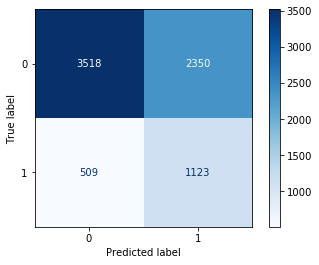

In [23]:
performance_results(X_train_scaled, y_train, y_hat_train, X_test_scaled, y_test, y_hat_test, logreg)

In [24]:
#Build ROC curve

y_score = logreg.fit(X_train_scaled, y_train).decision_function(X_test_scaled)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

AUC: 0.7139284959467768


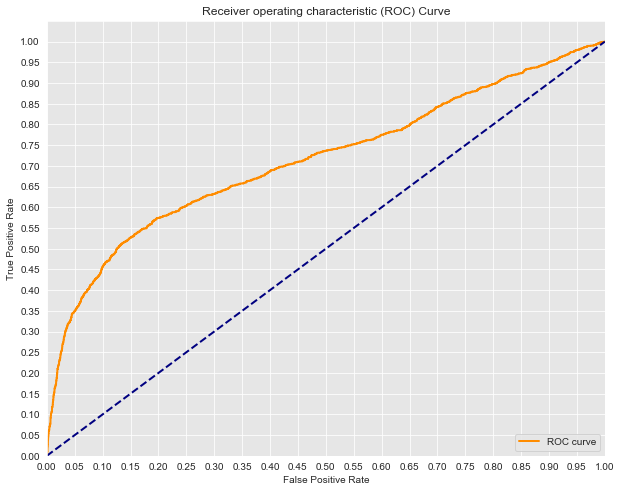

In [25]:
#Show ROC graph

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

AUC is 0.71 which is average. As shown in the graph above, imporvements to our model could move our ROC curve closer to the top left corner. 

### 3. KNN Model

In [26]:
#Fit and predict the model

knnmodel = KNeighborsClassifier(n_neighbors=1)
knnmodel.fit(X_train_scaled, y_train)

y_predict_test = knnmodel.predict(X_test_scaled)
y_predict_train = knnmodel.predict(X_train_scaled)



Train Score Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17496
           1       1.00      1.00      1.00      5004

    accuracy                           1.00     22500
   macro avg       1.00      1.00      1.00     22500
weighted avg       1.00      1.00      1.00     22500

Train Set Accuracy: 0.9991
Train Set Precision: 0.9978
Train Set Recall: 0.9980
Train Set F1-Score: 0.9979


Test Score Results
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      5868
           1       0.37      0.39      0.38      1632

    accuracy                           0.72      7500
   macro avg       0.60      0.60      0.60      7500
weighted avg       0.73      0.72      0.73      7500

Test Set Accuracy: 0.7224
Test Set Precision: 0.3695
Test Set Recall: 0.3903
Test Set F1-Score: 0.3796


Test Set Confusion Matrix


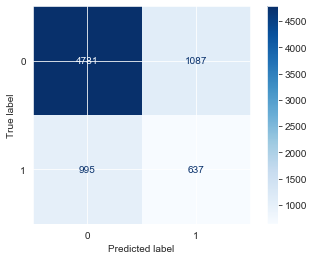

In [27]:
#Evaluate test results 

performance_results(X_train_scaled, y_train, y_predict_train, X_test_scaled, y_test, y_predict_test, knnmodel)

#### Hypertuning to find optimal value of K 

In [28]:
#Define function 
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=35):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [29]:
#Find optimal K for our dataset 
find_best_k(X_train_scaled, y_train, X_test_scaled, y_test)


Best Value for k: 13
F1-Score: 0.44497799119647863


In [30]:
#redo model fit with K=13

knnmodel2 = KNeighborsClassifier(n_neighbors=13)
knnmodel2.fit(X_train_scaled, y_train)

y_predict_test2 = knnmodel2.predict(X_test_scaled)
y_predict_train2 = knnmodel2.predict(X_train_scaled)




Train Score Results
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     17496
           1       0.69      0.36      0.47      5004

    accuracy                           0.82     22500
   macro avg       0.77      0.66      0.68     22500
weighted avg       0.81      0.82      0.80     22500

Train Set Accuracy: 0.8219
Train Set Precision: 0.6933
Train Set Recall: 0.3573
Train Set F1-Score: 0.4716


Test Score Results
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5868
           1       0.64      0.34      0.44      1632

    accuracy                           0.82      7500
   macro avg       0.74      0.64      0.67      7500
weighted avg       0.80      0.82      0.79      7500

Test Set Accuracy: 0.8151
Test Set Precision: 0.6413
Test Set Recall: 0.3407
Test Set F1-Score: 0.4450


Test Set Confusion Matrix


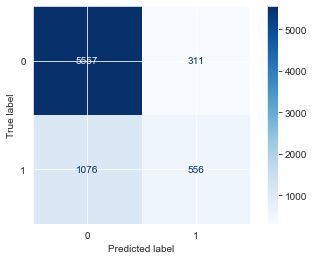

In [31]:
performance_results(X_train_scaled, y_train, y_predict_train2, X_test_scaled, y_test, y_predict_test2, knnmodel2)

### 4. Bayes Classification Model

In [32]:
#Instansiate the model 
bayes = GaussianNB()

In [33]:
#Fit the model, using the UNscaled X_train 
bayes.fit(X_train, y_train)

GaussianNB()

In [34]:
#Predict the model 
test_preds = bayes.predict(X_test)
train_preds = bayes.predict(X_train)



Train Score Results
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     17496
           1       0.42      0.07      0.12      5004

    accuracy                           0.77     22500
   macro avg       0.60      0.52      0.50     22500
weighted avg       0.70      0.77      0.70     22500

Train Set Accuracy: 0.7713
Train Set Precision: 0.4181
Train Set Recall: 0.0719
Train Set F1-Score: 0.1228


Test Score Results
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      5868
           1       0.44      0.08      0.14      1632

    accuracy                           0.78      7500
   macro avg       0.61      0.53      0.51      7500
weighted avg       0.71      0.78      0.71      7500

Test Set Accuracy: 0.7771
Test Set Precision: 0.4355
Test Set Recall: 0.0827
Test Set F1-Score: 0.1390


Test Set Confusion Matrix


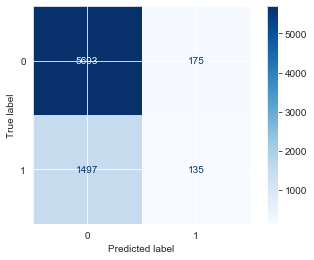

In [35]:
#Evaluate performance results
performance_results(X_train, y_train, train_preds, X_test, y_test, test_preds, bayes)

### 5. Decision Tree

### a. Classification

#### Model 1

In [36]:
#Instantiate the classifier and fit the data
decisiontree = DecisionTreeClassifier(random_state=10)
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [37]:
#predict the train and test data
y_preds = decisiontree.predict(X_test)
y_preds2 = decisiontree.predict(X_train)



Train Score Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17496
           1       1.00      1.00      1.00      5004

    accuracy                           1.00     22500
   macro avg       1.00      1.00      1.00     22500
weighted avg       1.00      1.00      1.00     22500

Train Set Accuracy: 0.9992
Train Set Precision: 0.9992
Train Set Recall: 0.9970
Train Set F1-Score: 0.9981


Test Score Results
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      5868
           1       0.37      0.40      0.38      1632

    accuracy                           0.72      7500
   macro avg       0.60      0.60      0.60      7500
weighted avg       0.73      0.72      0.72      7500

Test Set Accuracy: 0.7193
Test Set Precision: 0.3674
Test Set Recall: 0.4013
Test Set F1-Score: 0.3836


Test Set Confusion Matrix


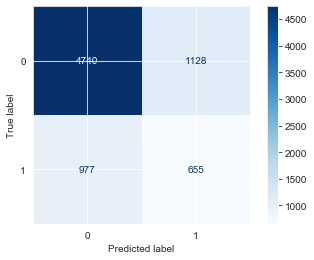

In [38]:
performance_results(X_train, y_train, y_preds2, X_test, y_test, y_preds, decisiontree)

#### Model 2

In [39]:
#Retry the classifier with Entropy

decisiontree2 = DecisionTreeClassifier(criterion='entropy', random_state=10)
decisiontree2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [40]:
#predict the train and test data
y_ent_preds = decisiontree2.predict(X_test)
y_ent_preds2 = decisiontree2.predict(X_train)



Train Score Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17496
           1       1.00      1.00      1.00      5004

    accuracy                           1.00     22500
   macro avg       1.00      1.00      1.00     22500
weighted avg       1.00      1.00      1.00     22500

Train Set Accuracy: 0.9992
Train Set Precision: 0.9992
Train Set Recall: 0.9970
Train Set F1-Score: 0.9981


Test Score Results
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      5868
           1       0.38      0.40      0.39      1632

    accuracy                           0.73      7500
   macro avg       0.60      0.61      0.61      7500
weighted avg       0.73      0.73      0.73      7500

Test Set Accuracy: 0.7264
Test Set Precision: 0.3778
Test Set Recall: 0.3977
Test Set F1-Score: 0.3875


Test Set Confusion Matrix


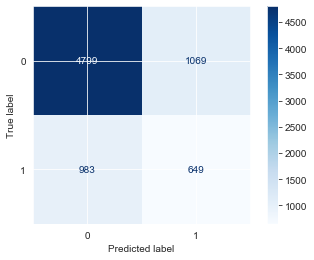

In [41]:
#Evaluate the results 
performance_results(X_train, y_train, y_ent_preds2, X_test, y_test, y_ent_preds, decisiontree2)

Accuracy score for the test set using entropy, with a result of 0.7263, is higher than test set accuracy score under gini, with an accuracy score of 0.7189.

#### Model 3

In [42]:
#Tune the max_depth hyperparameter to see if it improves results 
decisiontree3 = DecisionTreeClassifier(random_state=10, criterion="entropy", max_depth=3)
decisiontree3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=10)

In [43]:
#predict the train and test data
y_testpreds = decisiontree3.predict(X_test)
y_trainpreds = decisiontree3.predict(X_train)



Train Score Results
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     17496
           1       0.71      0.32      0.44      5004

    accuracy                           0.82     22500
   macro avg       0.77      0.64      0.66     22500
weighted avg       0.80      0.82      0.79     22500

Train Set Accuracy: 0.8189
Train Set Precision: 0.7076
Train Set Recall: 0.3167
Train Set F1-Score: 0.4376


Test Score Results
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      5868
           1       0.73      0.33      0.45      1632

    accuracy                           0.83      7500
   macro avg       0.78      0.65      0.67      7500
weighted avg       0.81      0.83      0.80      7500

Test Set Accuracy: 0.8271
Test Set Precision: 0.7279
Test Set Recall: 0.3278
Test Set F1-Score: 0.4520


Test Set Confusion Matrix


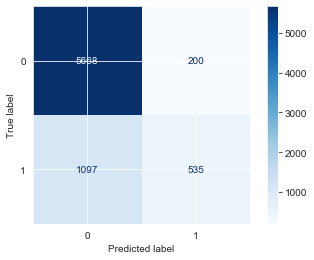

In [44]:
#Evaluate the results 
performance_results(X_train, y_train, y_trainpreds, X_test, y_test, y_testpreds, decisiontree3)

Accuracy for the test data did improve, from 72.6% in previous model to 83% when max depth is set to 3.

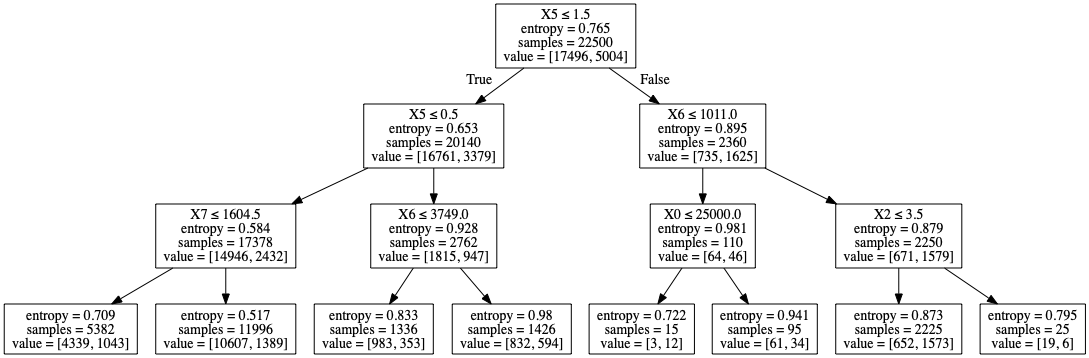

In [45]:
# Plot and show decision tree

dot_data = StringIO()
export_graphviz(decisiontree3, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### b. Regression

#### Model 1

In [46]:
#Instansiate and fit the model
regressor = DecisionTreeRegressor(random_state=45)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=45)

In [47]:
#predict the model
reg_preds = regressor.predict(X_test)

In [48]:
#Evaluate the results: MAE, MSE, RMSE 
print('Mean Absolute Error:', mean_absolute_error(y_test, reg_preds))  
print('Mean Squared Error:', mean_squared_error(y_test, reg_preds))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, reg_preds)))

Mean Absolute Error: 0.2780222222222222
Mean Squared Error: 0.2776925925925926
Root Mean Squared Error: 0.5269654567356314


#### Model 2

In [49]:
#Instansiate and fit the model with some hyperparameters (note these values are arbitrary for the moment)
regressor2 = DecisionTreeRegressor(random_state=45, max_depth=3, min_samples_split=5)
regressor2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=5, random_state=45)

In [50]:
#predict the model
reg_preds2 = regressor2.predict(X_test)

In [51]:
#Evaluate the results: MAE, MSE, RMSE 
print('Mean Absolute Error:', mean_absolute_error(y_test, reg_preds2))  
print('Mean Squared Error:', mean_squared_error(y_test, reg_preds2))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, reg_preds2)))

Mean Absolute Error: 0.27713287827399025
Mean Squared Error: 0.1367766321520286
Root Mean Squared Error: 0.3698332491164479


Including these hyperparameters caued our MAE, MSE and RMSE to decrease. 

### 6. Ensemble Methods

#### a. Bagging Method

In [52]:
#Instansiate and fit the model, choose a few hyperparameters to run through 
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [53]:
#make predictions
baggedpreds_train = bagged_tree.predict(X_train)
baggedpreds_test = bagged_tree.predict(X_test)



Train Score Results
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     17496
           1       0.71      0.32      0.44      5004

    accuracy                           0.82     22500
   macro avg       0.77      0.64      0.67     22500
weighted avg       0.81      0.82      0.79     22500

Train Set Accuracy: 0.8200
Train Set Precision: 0.7084
Train Set Recall: 0.3243
Train Set F1-Score: 0.4450


Test Score Results
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5868
           1       0.72      0.33      0.46      1632

    accuracy                           0.83      7500
   macro avg       0.78      0.65      0.68      7500
weighted avg       0.81      0.83      0.80      7500

Test Set Accuracy: 0.8268
Test Set Precision: 0.7205
Test Set Recall: 0.3333
Test Set F1-Score: 0.4558


Test Set Confusion Matrix


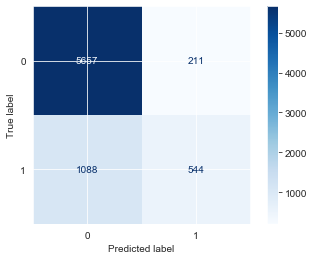

In [54]:
performance_results(X_train, y_train, baggedpreds_train, X_test, y_test, baggedpreds_test, bagged_tree)

#### b. Random Forest

In [55]:
#instansiate the model, choose some hyperparameters to run through, then fit 
randomforest = RandomForestClassifier(max_depth=5, criterion='gini', n_estimators=5, max_features=5)
randomforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=5, n_estimators=5)

In [56]:
#Make predictions on the model
rftrain = randomforest.predict(X_train)
rftest = randomforest.predict(X_test)



Train Score Results
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     17496
           1       0.71      0.33      0.45      5004

    accuracy                           0.82     22500
   macro avg       0.77      0.64      0.67     22500
weighted avg       0.81      0.82      0.79     22500

Train Set Accuracy: 0.8206
Train Set Precision: 0.7109
Train Set Recall: 0.3257
Train Set F1-Score: 0.4468


Test Score Results
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5868
           1       0.72      0.33      0.46      1632

    accuracy                           0.83      7500
   macro avg       0.78      0.65      0.68      7500
weighted avg       0.81      0.83      0.80      7500

Test Set Accuracy: 0.8271
Test Set Precision: 0.7236
Test Set Recall: 0.3321
Test Set F1-Score: 0.4553


Test Set Confusion Matrix


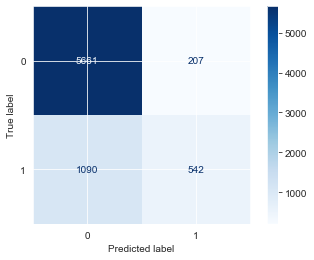

In [57]:
#Evaluate the model

performance_results(X_train, y_train, rftrain, X_test, y_test, rftest, randomforest)

In [59]:
# Create graph that shows the feature importances per tree 
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

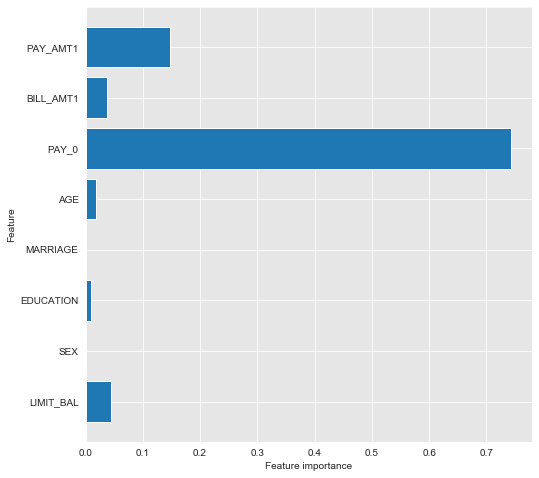

In [60]:
#Look at feature importances of first tree 
rf_tree1 = randomforest.estimators_[0]
plot_feature_importances(rf_tree1)

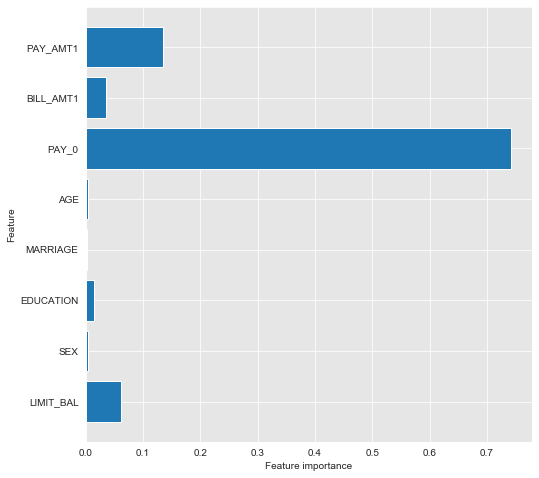

In [61]:
#Compare this feature importance to second tree 
rf_tree2 = randomforest.estimators_[1]
plot_feature_importances(rf_tree2)

In [112]:
# function for creating a feature importance dataframe
def features_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

In [113]:
#Look at feature importance for the entire forest  
overall_features = features_df(X_train.columns, randomforest.feature_importances_)
overall_features

,feature,feature_importance
0,PAY_0,0.758443
1,PAY_AMT1,0.107070
2,LIMIT_BAL,0.067132
3,BILL_AMT1,0.043633
4,EDUCATION,0.011246
5,AGE,0.010772
6,SEX,0.001013
7,MARRIAGE,0.000690


In [114]:
# function for plotting a feature importance histogram
def features_plot(df, title):
    df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = df, orient = 'h', color = 'blue') \
       .set_title(title, fontsize = 20)

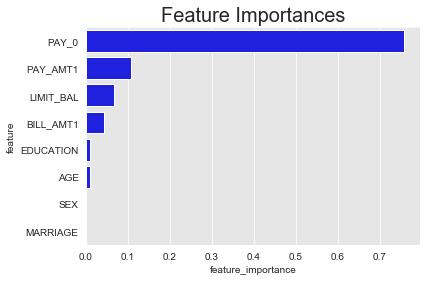

In [115]:
features_plot(overall_features, 'Feature Importances')

In [62]:
#Look at GridSearch to improve the Random Tree model 
rfc = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rfc, X_train, y_train, cv=3))
mean_rf_cv_score

0.8088888888888889

Our base model has a mean cross validation score of approximately 80.8%.

In [63]:
#Define the parameters to be looked at, then fit the Grid Search on the training data

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

gs_tree = GridSearchCV(rfc, param_grid, cv=3, return_train_score=True)
gs_tree.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [1, 5, 10, 20]},
             return_train_score=True)

In [64]:
#Display the best parameter combination found during the search 
#Print the mean cross-validated score of the best estimator in the search 
print(gs_tree.best_params_)
print(gs_tree.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.8188


The best score that was found in our GridSearch was 81.9%, which is a slight improvement from our base model result of 80.8%.

In [65]:
#Find the accuracy of the various grid search models on the train set and test set
gs_train_score = np.mean(gs_tree.cv_results_['mean_train_score'])
gs_test_score = gs_tree.score(X_test, y_test)
print(f"Mean Train Score: {gs_train_score :.2%}")
print(f"Mean Test Score: {gs_test_score :.2%}")

Mean Train Score: nan%
Mean Test Score: 82.76%


The mean train score and the mean test score of our GridSearch etc.. 

### 7. Boosting

#### a. Adaboost

In [66]:
#Instansiate and fit the model
adb = AdaBoostClassifier(random_state=42)
adb.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [67]:
#Predict the model
adb_train = adb.predict(X_train)
adb_test = adb.predict(X_test)



Train Score Results
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     17496
           1       0.68      0.32      0.44      5004

    accuracy                           0.82     22500
   macro avg       0.76      0.64      0.66     22500
weighted avg       0.80      0.82      0.79     22500

Train Set Accuracy: 0.8164
Train Set Precision: 0.6841
Train Set Recall: 0.3237
Train Set F1-Score: 0.4395


Test Score Results
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5868
           1       0.71      0.34      0.46      1632

    accuracy                           0.83      7500
   macro avg       0.77      0.65      0.68      7500
weighted avg       0.81      0.83      0.80      7500

Test Set Accuracy: 0.8264
Test Set Precision: 0.7094
Test Set Recall: 0.3425
Test Set F1-Score: 0.4620


Test Set Confusion Matrix


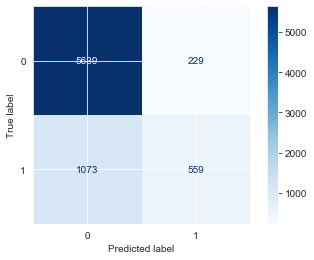

In [68]:
#Evaluate the results
performance_results(X_train, y_train, adb_train, X_test, y_test, adb_test, adb)

In [69]:
#Look at another performance measure: mean 3-Fold cross validation score 
adb_mean_cv = cross_val_score(adb, X, y, cv=3).mean()

print(f"Mean Adaboost Cross-Val Score (k=3): {adb_mean_cv: .2%}")

Mean Adaboost Cross-Val Score (k=3):  81.86%


#### b. Gradient Boosting

In [70]:
#Instansiate and fit the model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [71]:
#Predict the model
gb_train = gb.predict(X_train)
gb_test = gb.predict(X_test)



Train Score Results
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     17496
           1       0.71      0.33      0.45      5004

    accuracy                           0.82     22500
   macro avg       0.77      0.65      0.67     22500
weighted avg       0.81      0.82      0.79     22500

Train Set Accuracy: 0.8207
Train Set Precision: 0.7073
Train Set Recall: 0.3307
Train Set F1-Score: 0.4507


Test Score Results
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5868
           1       0.72      0.34      0.46      1632

    accuracy                           0.83      7500
   macro avg       0.78      0.65      0.68      7500
weighted avg       0.81      0.83      0.80      7500

Test Set Accuracy: 0.8275
Test Set Precision: 0.7189
Test Set Recall: 0.3401
Test Set F1-Score: 0.4617


Test Set Confusion Matrix


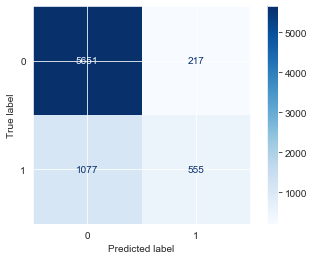

In [72]:
#Evaluate the results 
performance_results(X_train, y_train, gb_train, X_test, y_test, gb_test, gb)

In [73]:
#Look at another performance measure: mean 3-Fold cross validation score 
gb_mean_cv = cross_val_score(gb, X, y, cv=3).mean()

print(f"Mean Adaboost Cross-Val Score (k=3): {gb_mean_cv: .2%}")

Mean Adaboost Cross-Val Score (k=3):  81.98%


#### c. XGBoost

In [74]:
# Instantiate XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [75]:
#Predict train and test sets
xgb_train = xgb.predict(X_train)
xgb_test = xgb.predict(X_test)



Train Score Results
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     17496
           1       0.70      0.32      0.44      5004

    accuracy                           0.82     22500
   macro avg       0.77      0.64      0.67     22500
weighted avg       0.80      0.82      0.79     22500

Train Set Accuracy: 0.8192
Train Set Precision: 0.7043
Train Set Recall: 0.3227
Train Set F1-Score: 0.4426


Test Score Results
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5868
           1       0.72      0.33      0.46      1632

    accuracy                           0.83      7500
   macro avg       0.78      0.65      0.68      7500
weighted avg       0.81      0.83      0.80      7500

Test Set Accuracy: 0.8269
Test Set Precision: 0.7221
Test Set Recall: 0.3327
Test Set F1-Score: 0.4555


Test Set Confusion Matrix


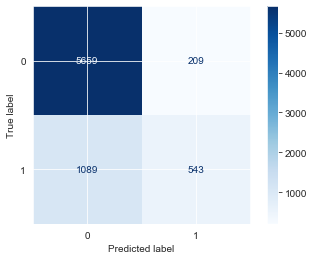

In [76]:
#Evaluate performance results 
performance_results(X_train, y_train, xgb_train, X_test, y_test, xgb_test, xgb)

In [77]:
#Tune some of the hyperparameters and see if this improves model
#Create the parameter grid to be used in GridSearch
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [78]:
#Instansiate and fit the grid search 
gs_xgb = GridSearchCV(xgb, param_grid, scoring='accuracy', n_jobs=1, cv=None)
gs_xgb.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [6],
                         'min_child_weight': [1, 2], 'n_estimators': [100],
                         'subsample': [0.5, 0.7]},
             scoring='accuracy')

In [79]:
#Display the optimal parameters
gs_xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.5}

In [80]:
#Predict the train and test sets 
gs_xgb_train = gs_xgb.predict(X_train)
gs_xgb_test = gs_xgb.predict(X_test)

In [81]:
#Display the accuracy scores for the train and test predictiosn 
print("Train Accuracy Score:")
print(accuracy_score(y_train, gs_xgb_train))
print("Test Accuracy Score:")
print(accuracy_score(y_test, gs_xgb_test))

Train Accuracy Score:
0.8332
Test Accuracy Score:
0.8246666666666667


### 8. Support Vector Machines

#### a. Linear Kernel

In [82]:
#Instansiate and fit the model
svclassifier = SVC(C=1000)
svclassifier.fit(X_train, y_train)

SVC(C=1000)

In [83]:
#make predictions 
sv_trainpred = svclassifier.predict(X_train)
sv_testpred = svclassifier.predict(X_test)



Train Score Results
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     17496
           1       0.83      0.00      0.00      5004

    accuracy                           0.78     22500
   macro avg       0.81      0.50      0.44     22500
weighted avg       0.79      0.78      0.68     22500

Train Set Accuracy: 0.7780
Train Set Precision: 0.8333
Train Set Recall: 0.0020
Train Set F1-Score: 0.0040


Test Score Results
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5868
           1       0.33      0.00      0.00      1632

    accuracy                           0.78      7500
   macro avg       0.56      0.50      0.44      7500
weighted avg       0.68      0.78      0.69      7500

Test Set Accuracy: 0.7821
Test Set Precision: 0.3333
Test Set Recall: 0.0012
Test Set F1-Score: 0.0024


Test Set Confusion Matrix


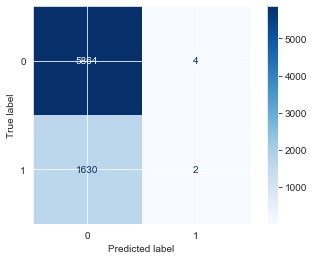

In [84]:
performance_results(X_train, y_train, sv_trainpred, X_test, y_test, sv_testpred, svclassifier)

#### b. Nonlinear Kernel

In [85]:
#Instantiate the classifier, fit and predict variables, include "time" to see how long model took to run 
tic = time()
svclassifier2 = SVC(kernel='rbf', C=1000, gamma=10)  
svclassifier2.fit(X_train, y_train) 
nlk_train = svclassifier2.predict(X_train)
nlk_test = svclassifier2.predict(X_test)
toc = time()
print("run time is {} seconds".format(toc-tic))

run time is 48.983971118927 seconds




Train Score Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17496
           1       1.00      1.00      1.00      5004

    accuracy                           1.00     22500
   macro avg       1.00      1.00      1.00     22500
weighted avg       1.00      1.00      1.00     22500

Train Set Accuracy: 0.9992
Train Set Precision: 0.9992
Train Set Recall: 0.9970
Train Set F1-Score: 0.9981


Test Score Results
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5868
           1       0.41      0.01      0.01      1632

    accuracy                           0.78      7500
   macro avg       0.60      0.50      0.44      7500
weighted avg       0.70      0.78      0.69      7500

Test Set Accuracy: 0.7819
Test Set Precision: 0.4091
Test Set Recall: 0.0055
Test Set F1-Score: 0.0109


Test Set Confusion Matrix


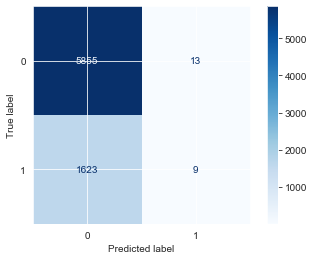

In [86]:
performance_results(X_train, y_train, nlk_train, X_test, y_test, nlk_test, svclassifier2)